## COVID DATASET ANALYSIS

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
dataset = pd.read_csv("COVID1.csv")
dataset

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...,NaN,NaN,NaN,NaN,NaN,NaN


#### Preprocess data

In [3]:
# Remove unwanted index column
dataset.set_index('id', inplace=True)
dataset

,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,...,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...,NaN,NaN,NaN,NaN,NaN,NaN
1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,...,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...,NaN,NaN,NaN,NaN,NaN,NaN
1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,...,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remove columns with all NaNs
dataset.dropna(axis=1, how='all', inplace=True)
dataset

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,
1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...


##### Analyse each data column to handle empty values

Handling missing values in coulmns numeric data

In [5]:
dataset.describe()

,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,888.000000,843.000000,560.000000,1085.000000,1081.000000
mean,48.841216,49.483689,0.042857,0.176959,0.144311
std,78.853528,18.255334,0.202716,0.381810,0.351567
min,1.000000,0.250000,0.000000,0.000000,0.000000
25%,11.000000,35.000000,0.000000,0.000000,0.000000
50%,28.000000,51.000000,0.000000,0.000000,0.000000
75%,67.250000,64.000000,0.000000,0.000000,0.000000
max,1443.000000,96.000000,1.000000,1.000000,1.000000


#### Case_in_country

In [6]:
# To tackle case_in_country, we have to consider each country's mean to fill missing values
country_case = pd.DataFrame(dataset.groupby("country")['case_in_country'].mean()).rename (
    columns={"case_in_country":"case_count"}).reset_index()
country_case

,country,case_count
0,Afghanistan,1.000000
1,Algeria,1.000000
2,Australia,8.000000
3,Austria,1.500000
4,Bahrain,9.000000
5,Belgium,1.000000
6,Cambodia,1.000000
7,Canada,6.500000
8,China,NaN
9,Croatia,1.000000


In [7]:
# If there are NaN values still, fill column with mean of the column
country_case.fillna(dataset.case_in_country.mean(), inplace=True)
country_case

,country,case_count
0,Afghanistan,1.000000
1,Algeria,1.000000
2,Australia,8.000000
3,Austria,1.500000
4,Bahrain,9.000000
5,Belgium,1.000000
6,Cambodia,1.000000
7,Canada,6.500000
8,China,48.841216
9,Croatia,1.000000


In [8]:
# Loop through each country and replace case count
for index, row in dataset.iterrows(): 
    for index, eachCountry in country_case.iterrows():
        if row['country'] == eachCountry['country']:
            dataset.loc[dataset.country == eachCountry['country'], 'case_in_country'] = eachCountry['case_count']
dataset

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,
1,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,48.841216,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1.500000,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1082,1.000000,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1083,1.000000,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...


#### Age

In [9]:
dataset.age.fillna(dataset.age.min(), inplace=True)
dataset

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,
1,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.00,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.00,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,48.841216,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.00,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.00,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.00,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1.500000,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.00,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1082,1.000000,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.00,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1083,1.000000,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,0.25,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...


#### If_onset_approximated

In [10]:
dataset.If_onset_approximated.fillna(dataset.If_onset_approximated.min(), inplace=True)
dataset

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,
1,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.00,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.00,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,48.841216,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.00,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.00,NaN,0.0,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.00,NaN,0.0,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1.500000,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.00,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1082,1.000000,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.00,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1083,1.000000,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,0.25,NaN,0.0,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...


#### visiting Wuhan

In [11]:
dataset["visiting Wuhan"].unique() # No null values

array([1, 0], dtype=int64)

#### from Wuhan

In [12]:
dataset["from Wuhan"].unique()

array([ 0.,  1., nan])

In [13]:
dataset["from Wuhan"].fillna(dataset["from Wuhan"].min(), inplace=True)
dataset

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,
1,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.00,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.00,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,48.841216,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.00,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.00,NaN,0.0,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.00,NaN,0.0,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,1.500000,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.00,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1082,1.000000,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.00,NaN,0.0,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1083,1.000000,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,0.25,NaN,0.0,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...


Handling missing values in coulmns non-numeric data

#### Summary

In [14]:
dataset['summary'].isnull().sum() # Missing values are there

5

In [15]:
dataset['summary'].fillna("No comments", inplace=True)
dataset['summary'].isnull().sum() # no missing values remain

0

#### Location

In [16]:
dataset['location'].isnull().sum() # no missing values

0

#### Country

In [17]:
dataset['country'].isnull().sum() # no missing values

0

#### Gender

In [18]:
dataset['gender'].isnull().sum() # missing values

183

In [19]:
dataset['gender'].unique()

array(['male', 'female', nan], dtype=object)

In [20]:
dataset['gender'].fillna("Other", inplace=True)
dataset['gender'].isnull().sum() # no missing values remain

0

#### Reporting Date

In [21]:
dataset['reporting date'].unique() # missing values

array(['1/20/2020', '1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020',
       '1/25/2020', '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020',
       '1/30/2020', '02/08/20', '2/15/2020', '2/25/2020', '2/26/2020',
       '2/27/2020', '2/28/2020', '1/15/2020', '1/31/2020', '02/01/20',
       '02/04/20', '02/05/20', '02/10/20', nan, '2/13/2020', '2/14/2020',
       '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020', '2/20/2020',
       '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020', '02/06/20',
       '02/07/20', '02/09/20', '02/11/20', '02/12/20', '02/02/20',
       '1/13/2020', '1/17/2020', '02/03/20'], dtype=object)

In [22]:
dataset['reporting date'].value_counts() # get highest reporting date

2/27/2020    91
2/20/2020    73
1/22/2020    61
2/26/2020    54
1/25/2020    52
2/25/2020    46
2/19/2020    42
1/24/2020    41
2/21/2020    35
2/24/2020    33
2/22/2020    31
1/31/2020    28
1/27/2020    28
2/23/2020    26
02/08/20     26
2/28/2020    25
1/26/2020    24
1/23/2020    24
02/06/20     24
02/04/20     24
1/30/2020    23
02/05/20     22
2/14/2020    21
1/29/2020    20
02/10/20     19
02/09/20     19
1/28/2020    18
2/13/2020    18
1/21/2020    18
2/16/2020    16
2/17/2020    14
02/11/20     13
2/15/2020    13
2/18/2020    13
02/01/20     12
02/02/20     10
02/07/20      8
02/03/20      7
02/12/20      6
1/20/2020     3
1/13/2020     1
1/15/2020     1
1/17/2020     1
Name: reporting date, dtype: int64

In [23]:
# Fill missing values with highest report date
dataset['reporting date'].fillna(dataset['reporting date'].value_counts().max(), inplace=True)
dataset['reporting date'].isnull().sum() # no missing values

0

#### Symptom Onset

In [24]:
dataset['symptom_onset'].isnull().sum()

522

In [25]:
dataset['symptom_onset'].unique()

array(['01/03/20', '1/15/2020', '01/04/20', nan, '01/11/20', '1/14/2020',
       '01/09/20', '1/16/2020', '1/19/2020', '01/15/2020', '01/10/20',
       '1/20/2020', '1/17/2020', '1/21/2020', '1/18/2020', '12/20/2019',
       '12/30/2019', '01/08/20', '01/13/2020', '01/12/20', '12/10/19',
       '12/22/2019', '01/05/20', '01/02/20', '01/06/20', '1/23/2020',
       '12/29/2019', '1/24/2020', '1/13/2020', '12/23/2019', '1/22/2020',
       '1/25/2020', '1/26/2020', '01/21/2020', '01/20/2020', '01/18/2020',
       '01/23/2020', '01/17/2020', '01/22/2020', '01/07/20', '2/24/2020',
       '1/29/2020', '1/30/2020', '1/31/2020', '02/08/20', '02/07/20',
       '02/02/20', '02/01/20', '02/05/20', '02/04/20', '02/03/20',
       '02/11/20', '2/13/2020', '2/15/2020', '02/06/20', '2/17/2020',
       '2/14/2020', '2/16/2020', '02/09/20', '2/19/2020', '2/18/2020',
       '02/10/20', '2/20/2020', '02/12/20', '2/21/2020', '2/22/2020',
       '2/25/2020', '2/23/2020', '2/26/2020', '1/27/2020', '1/28/2020'

In [26]:
dataset['symptom_onset'].value_counts() # get symptom_onset date

1/23/2020     27
1/25/2020     22
1/24/2020     21
1/30/2020     19
02/03/20      18
              ..
01/04/20       1
12/30/2019     1
01/13/2020     1
12/23/2019     1
01/07/20       1
Name: symptom_onset, Length: 70, dtype: int64

In [27]:
# Fill missing values with symptom_onset date
dataset['symptom_onset'].fillna(dataset['symptom_onset'].value_counts().max(), inplace=True)
dataset['symptom_onset'].isnull().sum() # no missing values

0

#### hosp_visit_date

In [28]:
dataset['hosp_visit_date'].isnull().sum()

578

In [29]:
dataset['hosp_visit_date'].unique()

array(['01/11/20', '1/15/2020', '1/17/2020', '1/19/2020', '1/14/2020',
       nan, '1/20/2020', '1/22/2020', '1/13/2020', '1/21/2020',
       '12/27/2019', '01/03/20', '1/16/2020', '12/31/2019', '1/18/2020',
       '01/06/20', '01/09/20', '01/05/20', '1/24/2020', '1/23/2020',
       '01/01/20', '01/12/20', '1/25/2020', '1/26/2020', '01/10/20',
       '2/27/2020', '2/26/2020', '1/27/2020', '1/28/2020', '1/29/2020',
       '1/30/2020', '1/31/2020', '02/10/20', '02/07/20', '02/08/20',
       '02/06/20', '02/12/20', '2//2020', '2/14/2020', '02/04/20',
       '2/15/2020', '2/17/2020', '02/11/20', '02/05/20', '2/13/2020',
       '2/18/2020', '2/19/2020', '2/16/2020', '02/09/20', '2/21/2020',
       '02/02/20', '02/03/20', '2/20/2020', '2/22/2020', '2/23/2020',
       '2/24/2020', '2/25/2020', '02/01/20', '01/08/20', '2/22/20',
       '2/28/2020'], dtype=object)

In [30]:
dataset['hosp_visit_date'].value_counts()

1/23/2020     34
1/24/2020     30
2/17/2020     20
1/21/2020     20
1/20/2020     19
1/25/2020     18
02/03/20      17
1/22/2020     16
1/30/2020     15
02/10/20      15
1/19/2020     15
2/25/2020     14
2/24/2020     13
2/22/2020     12
02/01/20      12
2/21/2020     12
02/07/20      11
1/28/2020     10
02/04/20      10
1/17/2020     10
2/18/2020      9
1/13/2020      8
1/29/2020      8
02/02/20       8
2/26/2020      8
1/31/2020      8
02/06/20       8
1/26/2020      8
2/19/2020      8
02/12/20       8
02/09/20       7
2/13/2020      7
1/27/2020      7
02/05/20       6
2/20/2020      6
2/23/2020      6
01/11/20       5
2/14/2020      5
02/08/20       5
02/11/20       5
2/15/2020      5
1/15/2020      5
1/18/2020      5
2/16/2020      4
1/14/2020      4
1/16/2020      3
01/09/20       3
01/06/20       2
2/27/2020      2
12/31/2019     1
2//2020        1
2/22/20        1
01/10/20       1
01/05/20       1
2/28/2020      1
01/08/20       1
12/27/2019     1
01/03/20       1
01/01/20      

In [31]:
dataset['hosp_visit_date'].fillna(dataset['hosp_visit_date'].value_counts().max(), inplace=True)
dataset['hosp_visit_date'].isnull().sum() # no missing values

0

#### exposure_start

In [32]:
dataset['exposure_start'].isnull().sum()

957

In [33]:
dataset['exposure_start'].value_counts()

1/26/2020     14
1/24/2020     12
1/20/2020      8
1/25/2020      7
1/23/2020      6
1/22/2020      6
01/12/20       6
01/11/20       5
01/10/20       5
2/19/2020      5
1/19/2020      5
1/18/2020      4
1/13/2020      4
01/08/20       3
01/09/20       3
2/15/2020      3
1/15/2020      3
1/21/2020      3
1/17/2020      2
1/27/2020      2
01/13/2020     2
01/03/20       2
02/12/20       2
02/10/20       1
2/20/2020      1
12/20/2019     1
01/19/2020     1
12/24/2019     1
1/30/2020      1
1/14/2020      1
01/06/20       1
2/21/2020      1
02/04/20       1
12/29/2019     1
02/11/20       1
2/17/2020      1
1/28/2020      1
12/17/2019     1
1/16/2020      1
Name: exposure_start, dtype: int64

In [34]:
dataset['exposure_start'].fillna(dataset['exposure_start'].value_counts().max(), inplace=True)
dataset['exposure_start'].isnull().sum() # no missing values

0

#### death

In [35]:
dataset['death'].isnull().sum() # no missing values

0

In [36]:
dataset['death'].unique()

array(['0', '1', '2/14/2020', '2/26/2020', '2/13/2020', '2/28/2020',
       '2/27/2020', '2/25/2020', '2/23/2020', '2/24/2020', '2/22/2020',
       '02/01/20', '2/19/2020', '2/21/2020'], dtype=object)

In [37]:
dataset['death'].value_counts()

0            1022
1              42
2/23/2020       4
2/26/2020       3
2/25/2020       2
2/21/2020       2
2/27/2020       2
2/19/2020       2
2/14/2020       1
2/28/2020       1
2/24/2020       1
2/22/2020       1
02/01/20        1
2/13/2020       1
Name: death, dtype: int64

In [38]:
# Change 1 to highest occuring date to identify when the patient died
dataset['death'].replace('1', '2/23/2020', inplace=True)
dataset['death'].isnull().sum()

0

In [39]:
dataset['death'].value_counts()

0            1022
2/23/2020      46
2/26/2020       3
2/25/2020       2
2/21/2020       2
2/27/2020       2
2/19/2020       2
2/14/2020       1
2/28/2020       1
2/24/2020       1
2/22/2020       1
02/01/20        1
2/13/2020       1
Name: death, dtype: int64

#### recovered

In [40]:
dataset['recovered'].isnull().sum()

0

In [41]:
dataset['recovered'].unique()

array(['0', '1', '02/12/20', '1/15/2020', '12/30/1899', '02/08/20',
       '2/14/2020', '02/04/20', '2/18/2020', '02/05/20', '2/17/2020',
       '02/09/20', '2/15/2020', '2/27/2020', '2/19/2020', '2/20/2020',
       '1/17/2020', '02/07/20', '2/21/2020', '2/23/2020', '02/11/20',
       '2/22/2020', '2/16/2020', '2/24/2020', '2/26/2020', '2/25/2020',
       '02/06/20', '2/28/2020', '1/30/2020', '2/13/2020', '02/02/20',
       '1/31/2020'], dtype=object)

In [42]:
dataset['recovered'].value_counts()

0             926
2/18/2020      13
2/19/2020      13
12/30/1899     12
02/12/20       11
2/21/2020      10
2/15/2020       9
2/20/2020       9
2/14/2020       8
2/17/2020       7
2/24/2020       7
1               7
02/09/20        6
2/26/2020       6
2/25/2020       5
2/27/2020       5
02/06/20        4
02/04/20        4
02/11/20        3
2/22/2020       3
2/16/2020       3
1/30/2020       2
02/05/20        2
02/08/20        2
02/02/20        1
2/23/2020       1
1/17/2020       1
02/07/20        1
1/31/2020       1
1/15/2020       1
2/28/2020       1
2/13/2020       1
Name: recovered, dtype: int64

In [43]:
dataset['recovered'].replace('1', '2/19/2020', inplace=True)
dataset['recovered'].isnull().sum()

0

#### symptom

In [44]:
dataset['symptom'].isnull().sum()

815

In [45]:
dataset['symptom'].fillna('Asymptomatic', inplace=True)

In [46]:
dataset['symptom'].isnull().sum()

0

#### Source 

In [47]:
dataset['source'].isnull().sum() # no missing values

0

In [48]:
dataset['source'].unique()

array(['Shenzhen Municipal Health Commission',
       'Official Weibo of Shanghai Municipal Health Commission',
       'Health Commission of Zhejiang Province', '人民日报官方微博',
       'Chongqing Municipal Health Commission', '央视新闻',
       'Beijing Municipal Health Commission', '人民日报',
       'National Health Commission', '新浪', 'Health Commission of Shanxi',
       'CNBC', 'CGTN', 'The Local', 'Bloomberg', 'Metro',
       'French Ministry of Health', 'nice matin', 'HK World-Japan',
       'NHK World-Japan', 'The Japan Times', 'Kyodo News', 'Bangkok Post',
       'Nippon', 'Reuters', 'Ministry of Health', 'Straits Times',
       'The Star Online', 'South China Morning Post', 'Channel News Asia',
       'Ministry of Health Singapore', 'Nikkei Asian Review',
       'Korea Bio Med', 'Yonnhap News Agency', 'KCDC', 'Taiwan News',
       'Taiwan CDC', 'Taiwan MOH', 'LA Times', 'The Hill', 'NBC', 'CDC',
       'NYT', 'Vietnam News', 'Vietnam Insider', 'The Guardian',
       'Yahoo News', 'ABC', 'S

#### link

In [49]:
dataset['link'].isnull().sum() # no missing values

0

#### Processed dataset

In [50]:
dataset.head()

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,
1,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,Asymptomatic,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,48.841216,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,14,01/12/20,0,1.0,0,0,Asymptomatic,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,48.841216,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,14,01/03/20,0,1.0,0,0,Asymptomatic,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,27,0.0,1/19/2020,14,NaN,1,0.0,0,0,Asymptomatic,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,48.841216,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,27,0.0,1/14/2020,14,NaN,0,0.0,0,0,Asymptomatic,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


### 1. Print reporting date where the patient died on same date and in which date symptom_onset is maximum.

In [51]:
# symptom_onset date is maximum at: 1/23/2020 
# if patient is dead, value is not 0
dataset_max_symptom = dataset[dataset['symptom_onset'] == "1/23/2020"]
dataset_max_symptom.head()

,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
id,,,,,,,,,,,,,,,,,,,
74,48.841216,1/23/2020,new confirmed COVID-19 pneumonia patient in He...,Heilongjiang,China,male,49.0,1/23/2020,0.0,34,14,1/23/2020,1,0.0,0,0,Asymptomatic,央视新闻,https://m.weibo.cn/status/4463892727709344?
125,48.841216,1/24/2020,confirmed imported COVID-19 pneumonia patient ...,Tianjin,China,male,29.0,1/23/2020,0.0,1/24/2020,1/19/2020,1/22/2020,1,0.0,0,0,Asymptomatic,央视新闻,https://m.weibo.cn/status/4464377615340049?
133,48.841216,1/25/2020,new confirmed imported COVID-19 pneumonia pati...,Shaanxi,China,male,46.0,1/23/2020,0.0,34,14,1/20/2020,0,1.0,0,0,Asymptomatic,央视新闻,https://m.weibo.cn/status/4464630291922122?
134,48.841216,1/25/2020,new confirmed imported COVID-19 pneumonia pati...,Shaanxi,China,female,45.0,1/23/2020,0.0,34,14,1/20/2020,0,1.0,0,0,Asymptomatic,央视新闻,https://m.weibo.cn/status/4464630291922122?
136,48.841216,1/25/2020,new confirmed imported COVID-19 pneumonia pati...,Shaanxi,China,male,40.0,1/23/2020,0.0,1/23/2020,14,1/23/2020,1,0.0,0,0,Asymptomatic,央视新闻,https://m.weibo.cn/status/4464630291922122?


In [52]:
required_output = dataset_max_symptom[dataset_max_symptom['death']!= 0 ]['reporting date']

In [53]:
required_output

id
74     1/23/2020
125    1/24/2020
133    1/25/2020
134    1/25/2020
136    1/25/2020
151    1/25/2020
154    1/25/2020
160    1/25/2020
198    1/25/2020
200    1/25/2020
240    1/26/2020
248    1/30/2020
427    1/24/2020
436     02/04/20
454    1/26/2020
466    1/31/2020
481     02/07/20
541    2/25/2020
659    1/24/2020
660    1/24/2020
697    1/24/2020
770    1/25/2020
773    1/29/2020
850    1/29/2020
874    1/24/2020
875    1/24/2020
886     02/04/20
Name: reporting date, dtype: object

### 2. Draw a chart of country wise with case_in_country.

In [54]:
# We have data in country_case already
country_case

,country,case_count
0,Afghanistan,1.000000
1,Algeria,1.000000
2,Australia,8.000000
3,Austria,1.500000
4,Bahrain,9.000000
5,Belgium,1.000000
6,Cambodia,1.000000
7,Canada,6.500000
8,China,48.841216
9,Croatia,1.000000


In [55]:
# round case counts to make meaningful data out of it
country_case['case_count'] = country_case['case_count'].round()
country_case

,country,case_count
0,Afghanistan,1.0
1,Algeria,1.0
2,Australia,8.0
3,Austria,2.0
4,Bahrain,9.0
5,Belgium,1.0
6,Cambodia,1.0
7,Canada,6.0
8,China,49.0
9,Croatia,1.0


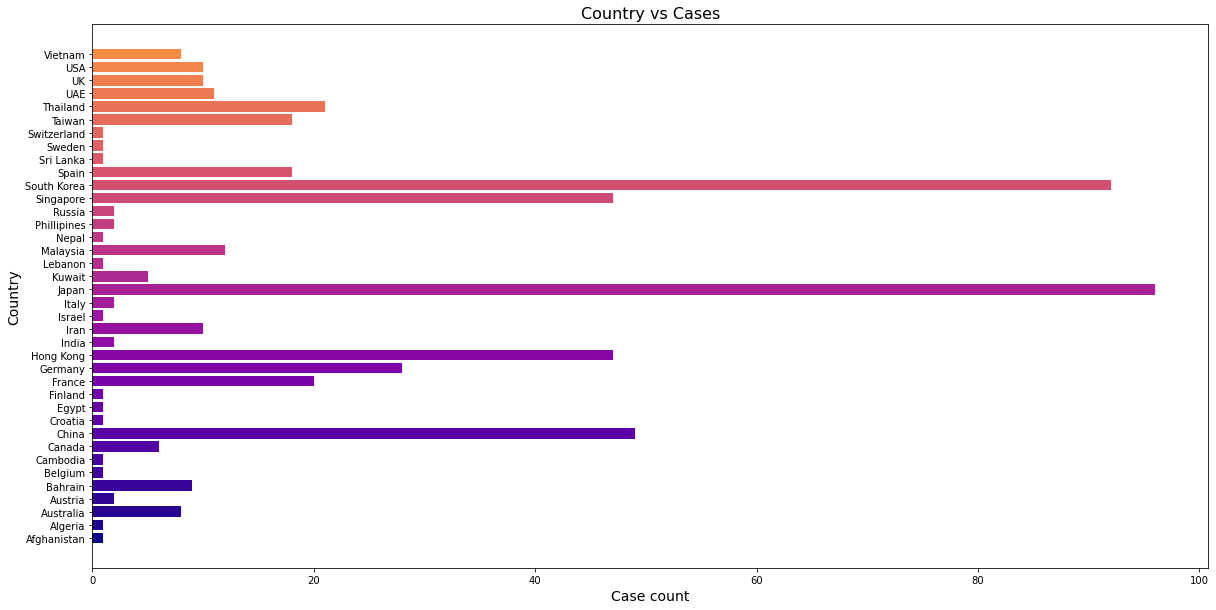

In [56]:
# Each value's Count / total count to get their contribution to plot
sizes = np.array(dataset['country'].value_counts().sort_index(ascending=True))/len(dataset) * 100

x_axis = list(country_case['country']) 
y_axis = list(country_case['case_count']) 

fig = plt.figure(figsize = (20, 10)) 

cmap = plt.get_cmap('plasma')

# creating the bar plot 
plt.barh(x_axis, y_axis, color =cmap(np.arange(len(sizes))*5))


plt.xlabel("Case count", fontsize=14) 
plt.ylabel("Country", fontsize=14) 
plt.title("Country vs Cases", fontsize=16) 
plt.show() 